In [99]:
url='https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [101]:
df=pd.read_csv(url)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [104]:
df[df.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [105]:
X=df.drop(columns='Outcome')
y=df['Outcome']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                                     shuffle=True, random_state=12, 
                                                     )

<Axes: >

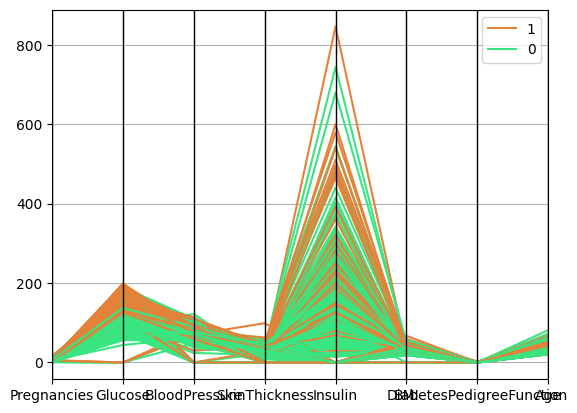

In [107]:
total_data = X
total_data["Outcome"] = y

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

ARBOL DE DECISION

In [108]:
arbol=DecisionTreeClassifier(random_state=12)
preds=arbol.fit(X_train,y_train).predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.7597402597402597

RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
RFC=RandomForestClassifier(random_state=12)

In [112]:
RandomPreds=RFC.fit(X_train,y_train).predict(X_test)

In [113]:
accuracy_score(y_test, RandomPreds)

0.8116883116883117

BOOOSTING

In [122]:
from xgboost import XGBClassifier

In [123]:
boost=XGBClassifier(random_state=12)

In [124]:
boostpreds=boost.fit(X_train,y_train).predict(X_test)

In [125]:
accuracy_score(y_test, boostpreds)

0.7402597402597403

GRID SEARCH ARBOL

In [114]:
parametros= {"max_depth": [10,20,30,40,50],
             "min_samples_split": [2,5,10,15],
             "min_samples_leaf": [1,2,4,6],
             "criterion": ["gini","entropy"]}

grid_search=GridSearchCV(estimator=arbol, param_grid=parametros,
                         scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [115]:

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
Mejor puntuación: 0.7296281487405037


In [116]:
arbol_optimo=grid_search.best_estimator_
y_pred=arbol_optimo.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



GRID RANDOM FOREST

In [118]:
parametros= {"n_estimators":[5,10,25,50],
             "max_features": ["sqrt","log2",None],
             "max_depth": [2,5,10,20,30],
             "min_samples_split": [2,5,10,15],
             "min_samples_leaf": [1,2,4,6],
             "criterion": ["gini","entropy"]}

grid_search=GridSearchCV(estimator=RFC, param_grid=parametros,
                         scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 25, 50]},
             scoring='accuracy')

In [119]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}
Mejor puntuación: 0.7850459816073571


In [120]:
rfc_optimo=grid_search.best_estimator_
y_pred2=rfc_optimo.predict(X_test)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



GRID BOOSTING

In [126]:
parametros= {'n_estimators': [100, 200],
             'learning_rate': [0.01, 0.1, 0.2],
             'max_depth': [3, 5, 7],
             'subsample': [0.6, 0.8, 1.0],
             'min_child_weight': [1, 2, 3]
            }

grid_search=GridSearchCV(estimator=boost, param_grid=parametros,
                         scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=12, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [127]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Mejor puntuación: 0.7751965880314541


In [130]:
boost_optimo=grid_search.best_estimator_
y_pred3=boost_optimo.predict(X_test)

In [131]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



Bueno hasta este punto vimos la diferencia entre Decision Tree, Random Forest y Boosting que a groso modo un Random Forest y un Boosting parten de la idea del arbol de decisión. Solamente que el Random Forest son varios arboles corriendo paralelamente y ponderando resultado y Boosting corren uno despues del otro mejorando a su antecesor. 